# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}?q={city}&appid={weather_api_key}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saipan
Processing Record 2 of Set 1 | brookings
Processing Record 3 of Set 1 | mahibadhoo
Processing Record 4 of Set 1 | hayma'
City not found. Skipping...
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | snezhinsk
Processing Record 7 of Set 1 | incheon
Processing Record 8 of Set 1 | ola
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | kulia village
City not found. Skipping...
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | thompson
Processing Record 14 of Set 1 | pathein
Processing Record 15 of Set 1 | port mathurin
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | gadzhiyevo
Processing Record 18 of Set 1 | nagqu
Processing Record 19 of Set 1 | petropavlovsk-kamchatsky
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | whitehorse
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saipan,15.1355,145.7010,29.39,54,40,6.17,MP,1710823304
1,brookings,44.3114,-96.7984,2.27,41,0,5.66,US,1710823305
2,mahibadhoo,3.7833,72.9667,28.60,68,3,5.01,MV,1710823305
3,blackmans bay,-43.0167,147.3167,28.07,51,57,2.68,AU,1710823306
4,snezhinsk,56.0850,60.7314,-3.91,84,93,4.02,RU,1710823306


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,29.39,54,40,6.17,MP,1710823304
1,brookings,44.3114,-96.7984,2.27,41,0,5.66,US,1710823305
2,mahibadhoo,3.7833,72.9667,28.60,68,3,5.01,MV,1710823305
3,blackmans bay,-43.0167,147.3167,28.07,51,57,2.68,AU,1710823306
4,snezhinsk,56.0850,60.7314,-3.91,84,93,4.02,RU,1710823306


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

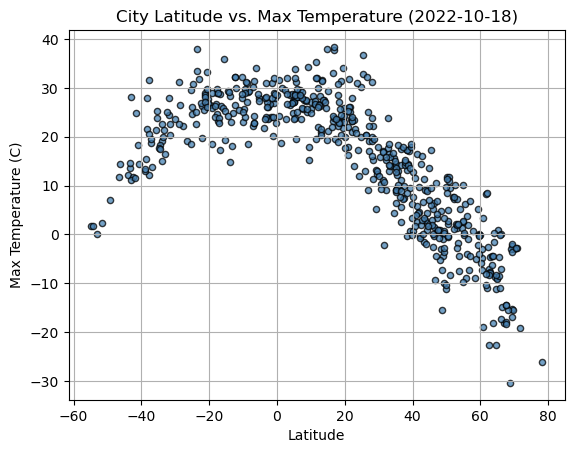

In [8]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
city_plot = city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, color = "steelblue", edgecolor = "black", s = 20, marker="o", alpha=0.75)
city_plot.set_xlabel("Latitude")
city_plot.set_ylabel("Max Temperature (C)")
city_plot.set_title("City Latitude vs. Max Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

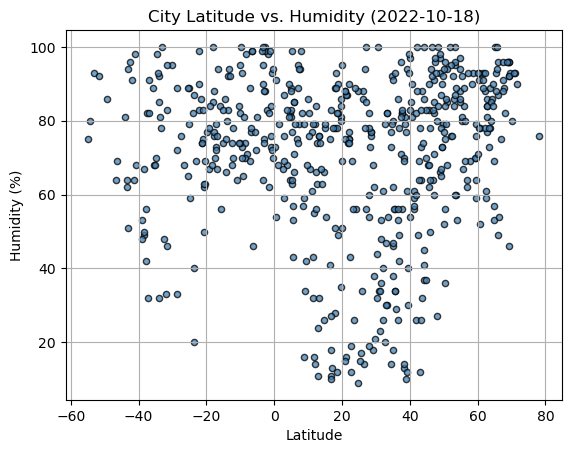

In [9]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plot_humidity = city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, color = "steelblue", edgecolor = "black", s = 20, marker="o", alpha=0.75)
plot_humidity.set_xlabel("Latitude")
plot_humidity.set_ylabel("Humidity (%)")
plot_humidity.set_title("City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

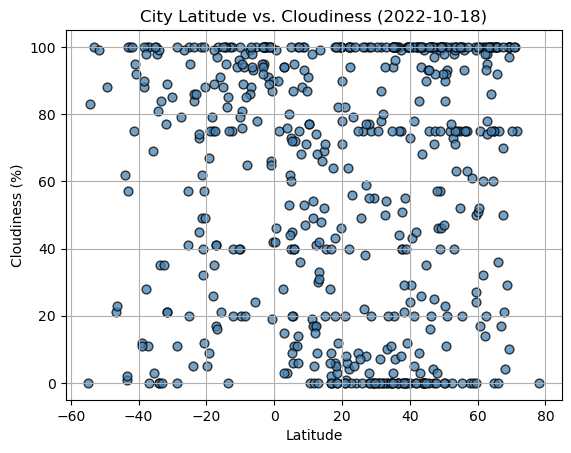

In [10]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plot_clouds = city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, color = "steelblue", edgecolor = "black", s = 40, marker="o", alpha=0.75)
plot_clouds.set_xlabel("Latitude")
plot_clouds.set_ylabel("Cloudiness (%)")
plot_clouds.set_title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

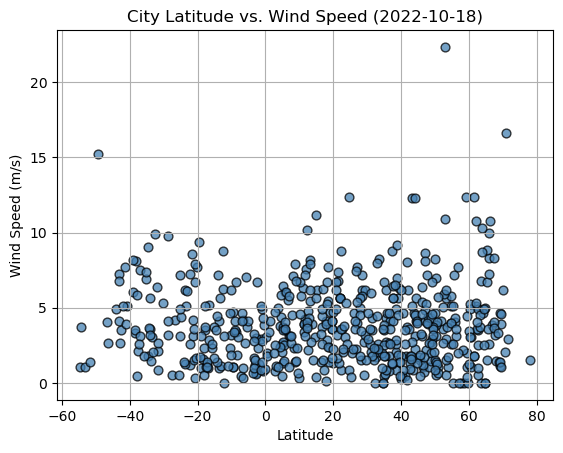

In [11]:
# Build the scatter plots for latitude vs. wind speed
plot_wind = city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, color = "steelblue", edgecolor = "black", s = 40, marker="o", alpha=0.75)
plot_wind.set_xlabel("Latitude")
plot_wind.set_ylabel("Wind Speed (m/s)")
plot_wind.set_title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(title, x_values, y_values, y_label, text_coordinates, file_path):
    
    # Run regression on hemisphere weather data
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    print(f"The r-value is: {rvalue}")
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    
    # Save the figure
    plt.savefig(file_path)

    # Show plot
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saipan,15.1355,145.7010,29.39,54,40,6.17,MP,1710823304
1,brookings,44.3114,-96.7984,2.27,41,0,5.66,US,1710823305
2,mahibadhoo,3.7833,72.9667,28.60,68,3,5.01,MV,1710823305
4,snezhinsk,56.0850,60.7314,-3.91,84,93,4.02,RU,1710823306
5,incheon,37.4500,126.4161,9.99,71,75,8.75,KR,1710823307


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,blackmans bay,-43.0167,147.3167,28.07,51,57,2.68,AU,1710823306
7,afaahiti,-17.7500,-149.2833,28.93,76,89,3.51,PF,1710823308
8,ushuaia,-54.8000,-68.3000,1.81,75,0,1.03,AR,1710823153
9,grytviken,-54.2811,-36.5092,1.70,80,83,3.72,GS,1710823309
12,port mathurin,-19.6833,63.4167,26.57,77,5,9.40,MU,1710823311


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.9001929553327452


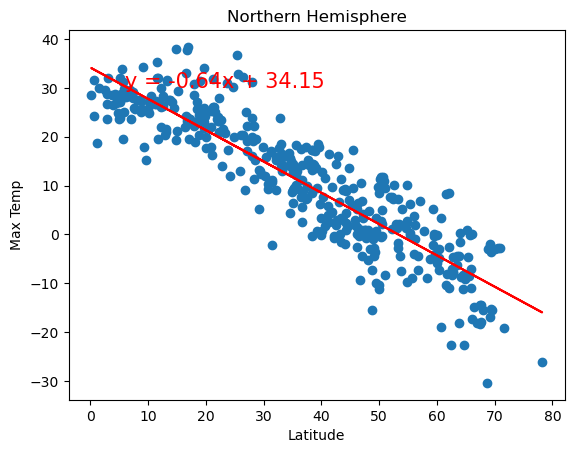

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression('Northern Hemisphere', x_values, y_values, 'Max Temp', (6,30), "output_data/Fig5.png")

The r-value is: 0.6471643790540244


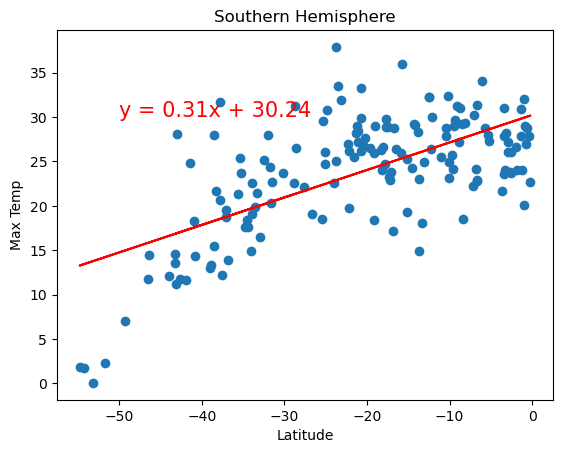

In [16]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression('Southern Hemisphere', x_values, y_values, 'Max Temp', (-50,30), "output_data/Fig6.png")


**Discussion about the linear relationship:** 

This observation suggests that latitude has a significant influence on maximum temperatures in the northern hemisphere but less so in the southern hemisphere. 

However, it's unclear if beyond latitude 0, as depicted, maximum temperatures will increase in the southern hemisphere. 

Therefore, we cannot conclude that latitude doesn't influence maximum temperature solely based on negative latitude numbers.



### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2635109736315808


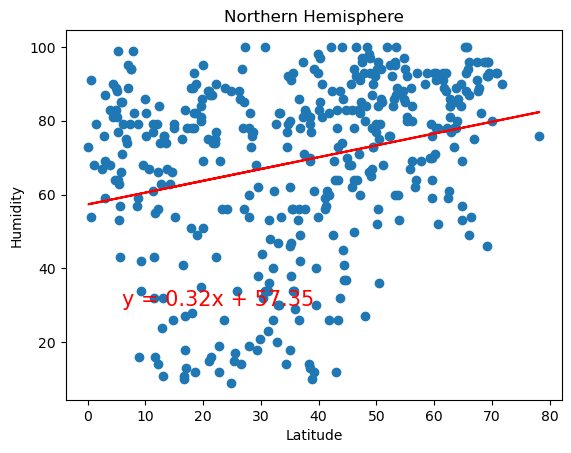

In [17]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression('Northern Hemisphere', x_values, y_values, 'Humidity', (6,30), "output_data/Fig7.png")

The r-value is: 0.22244825303520885


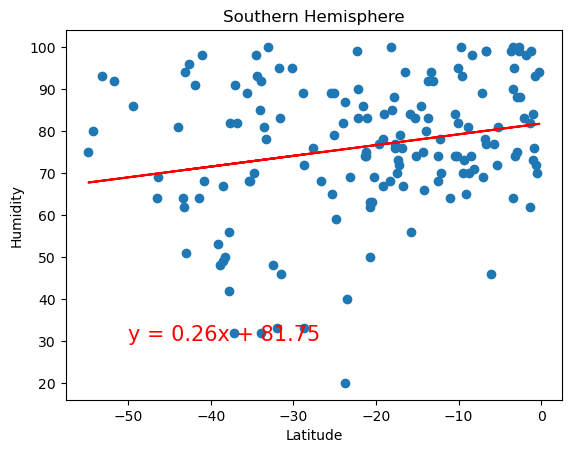

In [18]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression('Southern Hemisphere', x_values, y_values, 'Humidity', (-50,30), "output_data/Fig8.png")

**Discussion about the linear relationship:** 

Upon analyzing the regression lines comparing humidity and latitude for both the northern and southern hemispheres, it becomes apparent that there is no significant correlation between latitude and humidity.

For the northern hemisphere, the analysis is limited to latitudes below 80, while for the southern hemisphere, the analysis is restricted to latitudes below 0.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.20837232367653133


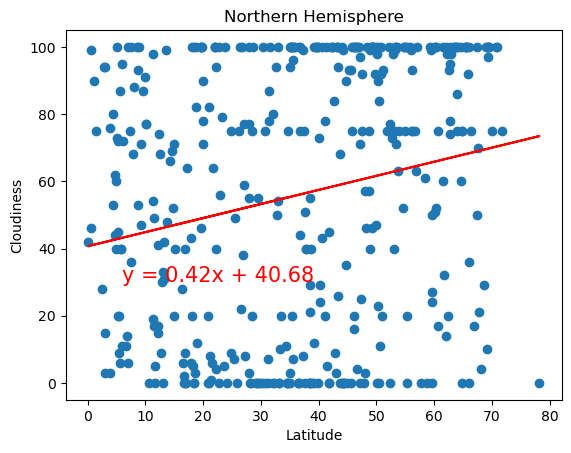

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression('Northern Hemisphere', x_values, y_values, 'Cloudiness', (6,30), "output_data/Fig9.png")

The r-value is: 0.2510832678342774


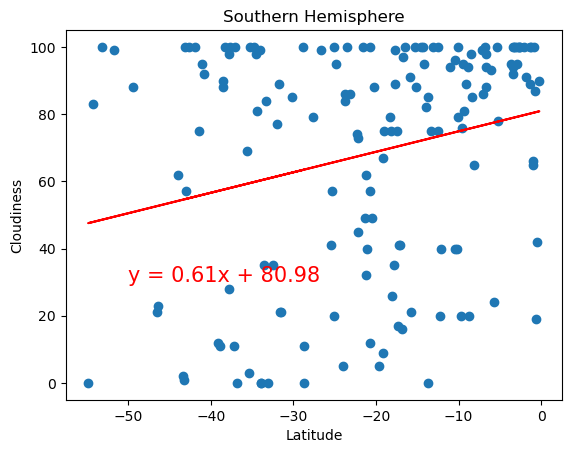

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression('Southern Hemisphere', x_values, y_values, 'Cloudiness', (-50,30), "output_data/Fig10.png")

**Discussion about the linear relationship:** 

Upon analyzing the regression lines comparing cloudiness and latitude for both the northern and southern hemispheres, it becomes apparent that there is no significant correlation between latitude and humidity.

For the northern hemisphere, the analysis is limited to latitudes below 80, while for the southern hemisphere, the analysis is restricted to latitudes below 0.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.03499901963193836


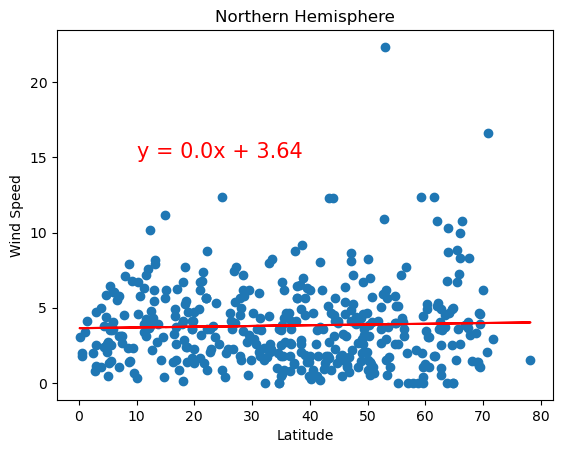

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression('Northern Hemisphere', x_values, y_values, 'Wind Speed', (10,15), "output_data/Fig11.png")

The r-value is: -0.2692311762640556


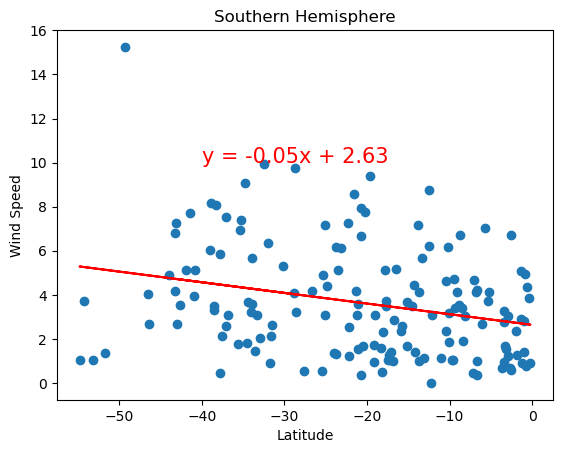

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression('Southern Hemisphere', x_values, y_values, 'Wind Speed', (-40,10), "output_data/Fig12.png")

**Discussion about the linear relationship:** 

This observation suggests that latitude has a influence on maximum wind speed in the northern hemisphere but less so in the southern hemisphere. 

However, it's unclear if beyond latitude 0, as depicted, wind speed will increase in the southern hemisphere. 

Therefore, we cannot conclude that latitude doesn't influence wind speed solely based on negative latitude numbers.